In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
from urllib.parse import urlparse
import os

In [4]:
from google.colab import files

# Upload the file to '/content/' directory in Colab
uploaded = files.upload()

Saving internal_all.csv to internal_all.csv


In [5]:
file_path = 'internal_all.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path, header=0, parse_dates=['Last Modified'])

In [6]:
df.head(5)

,Address,Content Type,Status Code,Status,Indexability,Indexability Status,Title 1,Title 1 Length,Title 1 Pixel Width,Meta Description 1,...,Grammar Errors,Hash,Response Time,Last Modified,Redirect URL,Redirect Type,Cookies,HTTP Version,URL Encoded Address,Crawl Timestamp
0,https://authentic-alternatives.com/,text/html; charset=UTF-8,200,OK,Indexable,NaN,Online Business Coach & Consultant - Authentic...,59,537,"No cookie-cutter, no BS. A seasoned online bus...",...,NaN,a8ca503f3017b27ee543f1d890f31a93,2.893,NaT,NaN,NaN,NaN,1.1,https://authentic-alternatives.com/,2023-07-10 16:46:50
1,https://authentic-alternatives.com/wp-content/...,text/css,200,OK,Indexable,NaN,NaN,0,0,NaN,...,NaN,NaN,0.778,2023-06-10 16:08:45+00:00,NaN,NaN,NaN,1.1,https://authentic-alternatives.com/wp-content/...,2023-07-10 16:46:58
2,https://authentic-alternatives.com/wp-includes...,application/javascript,200,OK,Indexable,NaN,NaN,0,0,NaN,...,NaN,NaN,0.932,2023-04-01 14:42:46+00:00,NaN,NaN,NaN,1.1,https://authentic-alternatives.com/wp-includes...,2023-07-10 16:46:58
3,https://authentic-alternatives.com/wp-content/...,image/jpeg,200,OK,Indexable,NaN,NaN,0,0,NaN,...,NaN,NaN,0.983,2023-05-25 10:31:17+00:00,NaN,NaN,NaN,1.1,https://authentic-alternatives.com/wp-content/...,2023-07-10 16:46:58
4,https://authentic-alternatives.com/privacy-pol...,text/html; charset=UTF-8,200,OK,Indexable,NaN,Privacy Policy - Authentic Alternatives,39,338,NaN,...,NaN,f207ba43e01bd86e64fd884e3d1866cb,1.138,NaT,NaN,NaN,NaN,1.1,https://authentic-alternatives.com/privacy-pol...,2023-07-10 16:46:58


In [7]:
df['Page Type'] = df['Address'].apply(lambda x: urlparse(x).path.split("/")[1])

In [8]:
df['Page Type'].value_counts()

wp-content                                                                    141
category                                                                       15
ord                                                                             5
resources                                                                       4
wp-includes                                                                     4
                                                                             ... 
small-business-consulting-services-for-the-entrepreneur-small-is-beautiful      1
some-feedback-on-glass-block-story                                              1
a-blueprint-for-success-how-to-set-practical-small-business-goals               1
what-is-a-business-coach-and-how-do-they-help                                   1
leadership                                                                      1
Name: Page Type, Length: 77, dtype: int64

In [9]:
aggregated_df = df[['Page Type', 'Word Count']].groupby(['Page Type']).agg('sum')


In [10]:
aggregated_df.head(100).sort_values(by=['Word Count'], ascending = False)


,Word Count
Page Type,
category,4130
inside-the-founding-of-newsweek,3189
testimonials,2854
a-blueprint-for-success-how-to-set-practical-small-business-goals,2572
business-consultant-vs-coach,2551
...,...
socially-responsible-companies,0
author,0
small-business-coaching,0


In [11]:
df['Status Code'].value_counts()

200    226
301     23
404      1
Name: Status Code, dtype: int64

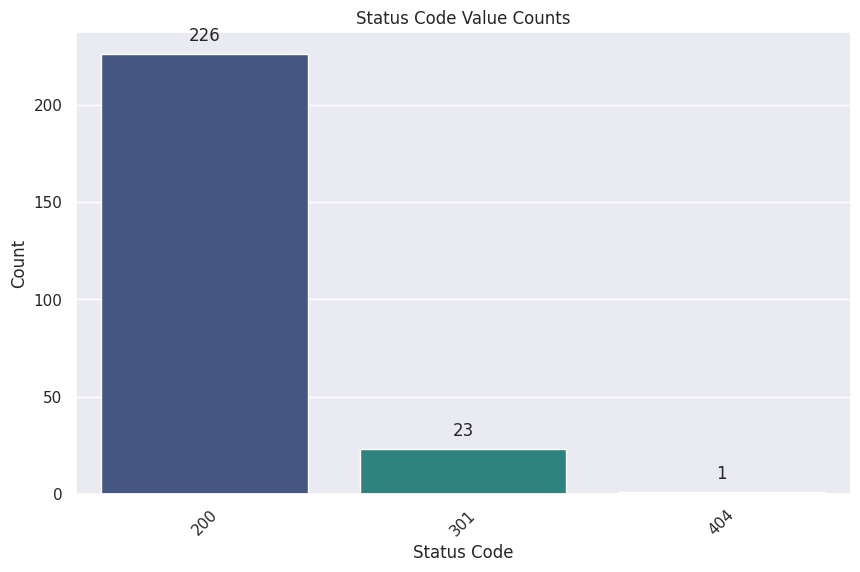

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the value counts
value_counts = df['Status Code'].value_counts()

# Set the plot style
sns.set(style="darkgrid")

# Create a bar plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
ax = sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis")

# Add labels and title
ax.set_title("Status Code Value Counts")
ax.set_xlabel("Status Code")
ax.set_ylabel("Count")

# Add count labels to the bars
for i, count in enumerate(value_counts.values):
    ax.text(i, count + 5, count, ha='center', va='bottom')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [13]:
redirect_df = df[df['Status Code'] == 301][['Address', 'Status Code']]
print(redirect_df)

                                               Address  Status Code
8    https://authentic-alternatives.com/author/59al...          301
27   https://authentic-alternatives.com/author/gree...          301
37     https://authentic-alternatives.com/testimonials          301
53   https://authentic-alternatives.com/business-bl...          301
150  https://www.authentic-alternatives.com/small-b...          301
155  https://www.authentic-alternatives.com/systems...          301
164  https://www.authentic-alternatives.com/systems...          301
167  https://www.authentic-alternatives.com/ord/two...          301
175  https://www.authentic-alternatives.com/ord/how...          301
187  https://www.authentic-alternatives.com/sociall...          301
190  https://authentic-alternatives.com/articles/he...          301
193  https://www.authentic-alternatives.com/uncateg...          301
203  https://www.authentic-alternatives.com/systems...          301
206  https://www.authentic-alternatives.com/unca

In [14]:
df_400_pages = df[df['Status Code'] >= 400][['Address', 'Status Code']]
print(df_400_pages)

                                               Address  Status Code
241  https://authentic-alternatives.com/ord/how-los...          404


In [15]:
pd.set_option('display.max_rows', None)
crawl_depth = df[df['Crawl Depth'] > 3][['Address', 'Crawl Depth']]
print("Crawl depth too deep: \n", crawl_depth)

Crawl depth too deep: 
                                                Address  Crawl Depth
171  https://authentic-alternatives.com/wp-content/...            4
172  https://authentic-alternatives.com/wp-content/...            4
173  https://authentic-alternatives.com/forest-for-...            4
174  https://authentic-alternatives.com/celebrate-w...            4
175  https://www.authentic-alternatives.com/ord/how...            4
176  https://authentic-alternatives.com/wp-content/...            4
177  https://authentic-alternatives.com/if-youre-an...            4
178  https://authentic-alternatives.com/wp-content/...            4
179  https://authentic-alternatives.com/birth-of-an...            4
180  https://authentic-alternatives.com/wp-content/...            4
181  https://authentic-alternatives.com/2-hounds-de...            4
182        https://authentic-alternatives.com/50-what/            4
183  https://authentic-alternatives.com/wp-content/...            4
184  https://authentic-a

In [16]:
noindex_follow = df[df['Meta Robots 1'] == "noindex, follow"][['Address', 'Meta Robots 1']]
print('Noindex & Follow: \n', noindex_follow)

Noindex & Follow: 
                                                Address    Meta Robots 1
45   https://authentic-alternatives.com/category/bl...  noindex, follow
50   https://authentic-alternatives.com/category/le...  noindex, follow
75   https://authentic-alternatives.com/category/ar...  noindex, follow
85   https://authentic-alternatives.com/category/ma...  noindex, follow
109  https://authentic-alternatives.com/category/in...  noindex, follow
110  https://authentic-alternatives.com/some-feedba...  noindex, follow
113  https://authentic-alternatives.com/changing-th...  noindex, follow
115  https://authentic-alternatives.com/category/fe...  noindex, follow
116  https://authentic-alternatives.com/become-a-ti...  noindex, follow
118  https://authentic-alternatives.com/category/sy...  noindex, follow
133  https://authentic-alternatives.com/category/ma...  noindex, follow
142  https://authentic-alternatives.com/category/cl...  noindex, follow
154  https://authentic-alternatives.com/the-

In [17]:
#index_follow = df[df['Meta Robots 1'].apply(lambda x: isinstance(x, str) and 'index' in x and 'follow' in x)][['Address', 'Meta Robots 1']]
#print('Index & Follow: \n', index_follow)

Index & Follow: 
                                                Address  \
0                  https://authentic-alternatives.com/   
4    https://authentic-alternatives.com/privacy-pol...   
5    https://authentic-alternatives.com/articles-bo...   
12           https://authentic-alternatives.com/about/   
13    https://authentic-alternatives.com/testimonials/   
15   https://authentic-alternatives.com/find-best-b...   
16   https://authentic-alternatives.com/coaching-co...   
18    https://authentic-alternatives.com/terms-of-use/   
19   https://authentic-alternatives.com/growing-you...   
24   https://authentic-alternatives.com/resources/a...   
26         https://authentic-alternatives.com/contact/   
28   https://authentic-alternatives.com/how-to-crea...   
45   https://authentic-alternatives.com/category/bl...   
50   https://authentic-alternatives.com/category/le...   
55   https://authentic-alternatives.com/business-co...   
57   https://authentic-alternatives.com/inside-the-...

In [18]:
title_missing = df[df['Title 1 Length'] == 0][['Address', 'Title 1 Length']]
print("Title tag missing: \n", title_missing)

Title tag missing: 
                                                Address  Title 1 Length
1    https://authentic-alternatives.com/wp-content/...               0
2    https://authentic-alternatives.com/wp-includes...               0
3    https://authentic-alternatives.com/wp-content/...               0
6    https://authentic-alternatives.com/wp-content/...               0
7    https://authentic-alternatives.com/wp-content/...               0
8    https://authentic-alternatives.com/author/59al...               0
9    https://authentic-alternatives.com/wp-content/...               0
10   https://authentic-alternatives.com/wp-content/...               0
11   https://authentic-alternatives.com/wp-content/...               0
14   https://authentic-alternatives.com/wp-content/...               0
17   https://authentic-alternatives.com/wp-content/...               0
20   https://authentic-alternatives.com/wp-includes...               0
21   https://authentic-alternatives.com/wp-content/...  

In [19]:
title_too_long = df[df['Title 1 Length'] > 70][['Address', 'Title 1 Length']]
print("Title too long: \n", title_too_long)

Title too long: 
                                                Address  Title 1 Length
28   https://authentic-alternatives.com/how-to-crea...             104
83   https://authentic-alternatives.com/two-keys-to...              75
101  https://authentic-alternatives.com/what-is-a-b...              71
112  https://authentic-alternatives.com/small-busin...             101
120  https://authentic-alternatives.com/client-spot...              72
121  https://authentic-alternatives.com/small-busin...              75
141  https://authentic-alternatives.com/ny-times-gi...              80
146  https://authentic-alternatives.com/the-amazing...              80
173  https://authentic-alternatives.com/forest-for-...              78
186  https://authentic-alternatives.com/living-on-t...              80
230  https://authentic-alternatives.com/a-complaint...              71
